In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Xsec_sig = 0.004942
Xsec_bkg = 0.02353
#Gen_sig  = 443712
#Gen_bkg  = 444288
Lumi	 = 35900

path='../data/data_normal_by_all/'

test_data  =pd.read_csv(path+'test_data.csv', sep=',')

Gen_sig = test_data.query("issig > 0").shape[0]
Gen_bkg = test_data.query("issig == 0").shape[0]
print(Gen_sig)
print(Gen_bkg)

y_true = test_data['issig']

y_true = y_true.astype('int32')

y_pred = np.load('../training/prediction_nn_log.pyc.npy')

148032
147968


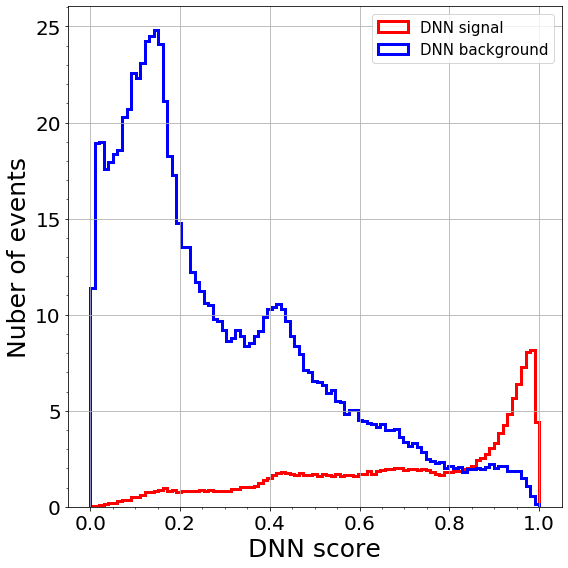

In [2]:

## --Score out
idx_sig = np.where(y_true == 1)[0]
idx_bkg =np.where(y_true == 0)[0]

hist_pred_sig = y_pred[idx_sig]
hist_pred_bkg = y_pred[idx_bkg]


weight_sig = np.ones(hist_pred_sig.shape) * Xsec_sig / Gen_sig * Lumi
weight_bkg = np.ones(hist_pred_bkg.shape) * Xsec_bkg / Gen_bkg * Lumi



plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rcParams["figure.figsize"] = (8,8)


bins = np.linspace(0,1,100)
normed_hist_sig = plt.hist(hist_pred_sig,bins=bins,color='r',histtype='step',linewidth=3,weights=weight_sig,label='DNN signal')
normed_hist_bkg = plt.hist(hist_pred_bkg,bins=bins,color='b',histtype='step',linewidth=3,weights=weight_bkg,label='DNN background')
plt.xlabel('DNN score',fontsize=25)
plt.ylabel('Nuber of events',fontsize=25)
plt.legend(prop={'size':15})

#plt.xscale('log')
#plt.yscale('log')

plt.grid(which='major', linestyle='-')
plt.minorticks_on()

plt.tight_layout()
plt.savefig("normed_score.png")

In [3]:
N_bkg = normed_hist_bkg[0]
N_sig = normed_hist_sig[0]

Score = list([round(i*0.01,2) for i in range(0,100)])

#print(Score)

In [4]:
import math

In [5]:
arr_significance = []
for cut in range(0,len(Score)-1,1):
    sig_integral = sum(N_sig[cut:])
    bkg_integral = sum(N_bkg[cut:])
    #print(sig_integral,bkg_integral)
    significance = sig_integral / math.sqrt(sig_integral+bkg_integral)
    arr_significance.append(significance)

In [9]:
# Highest Significance
print(arr_significance.index(max(arr_significance)))
print(max(arr_significance))

59
7.811061160473836


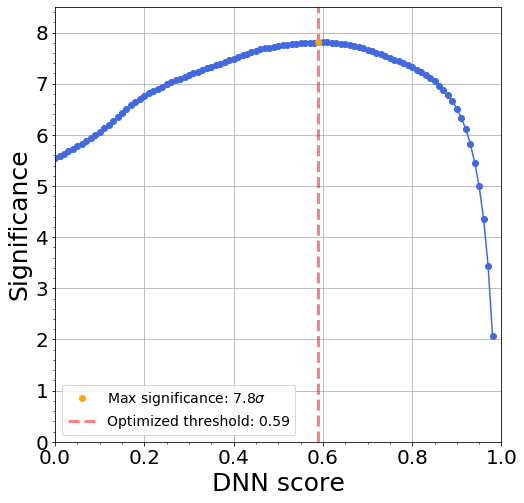

In [17]:
x_max = 0.59
x_dot = x_max
y_dot = 7.811061160473836
plt.rcParams["legend.loc"] = 'lower left'
plt.plot(list([round(i*0.01,2) for i in range(0,99)]),arr_significance,'-o',color='royalblue')
plt.xlabel('DNN score',fontsize=25)
plt.ylabel('Significance',fontsize=25)
plt.vlines(x_max, ymin=0, ymax=10, linestyle='dashed',linewidth=3, alpha=0.5, color='red',label='Optimized threshold: 0.59')
plt.plot(x_dot, y_dot, 'o',color='orange', label='Max significance: 7.8$\sigma$')
plt.xlim(0,1)
plt.ylim(0,8.5)
plt.legend(prop={'size':14})
plt.grid(which='major', linestyle='-')
plt.minorticks_on()
plt.savefig("Significance.png")